a0= 0.015128571172831756
a1= -0.06870435684090559
a2= 0.7000253222011565
a3= -5.4692442159100665
[0.015128571172831756, -0.06870435684090559, 0.7000253222011565, -5.4692442159100665]
rmse of Q.D.= 9.205439062381838e-05
EQUATION OF PREDICTED QD =


EQUATION of a =


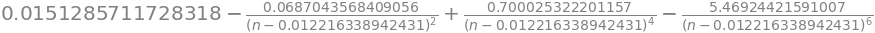

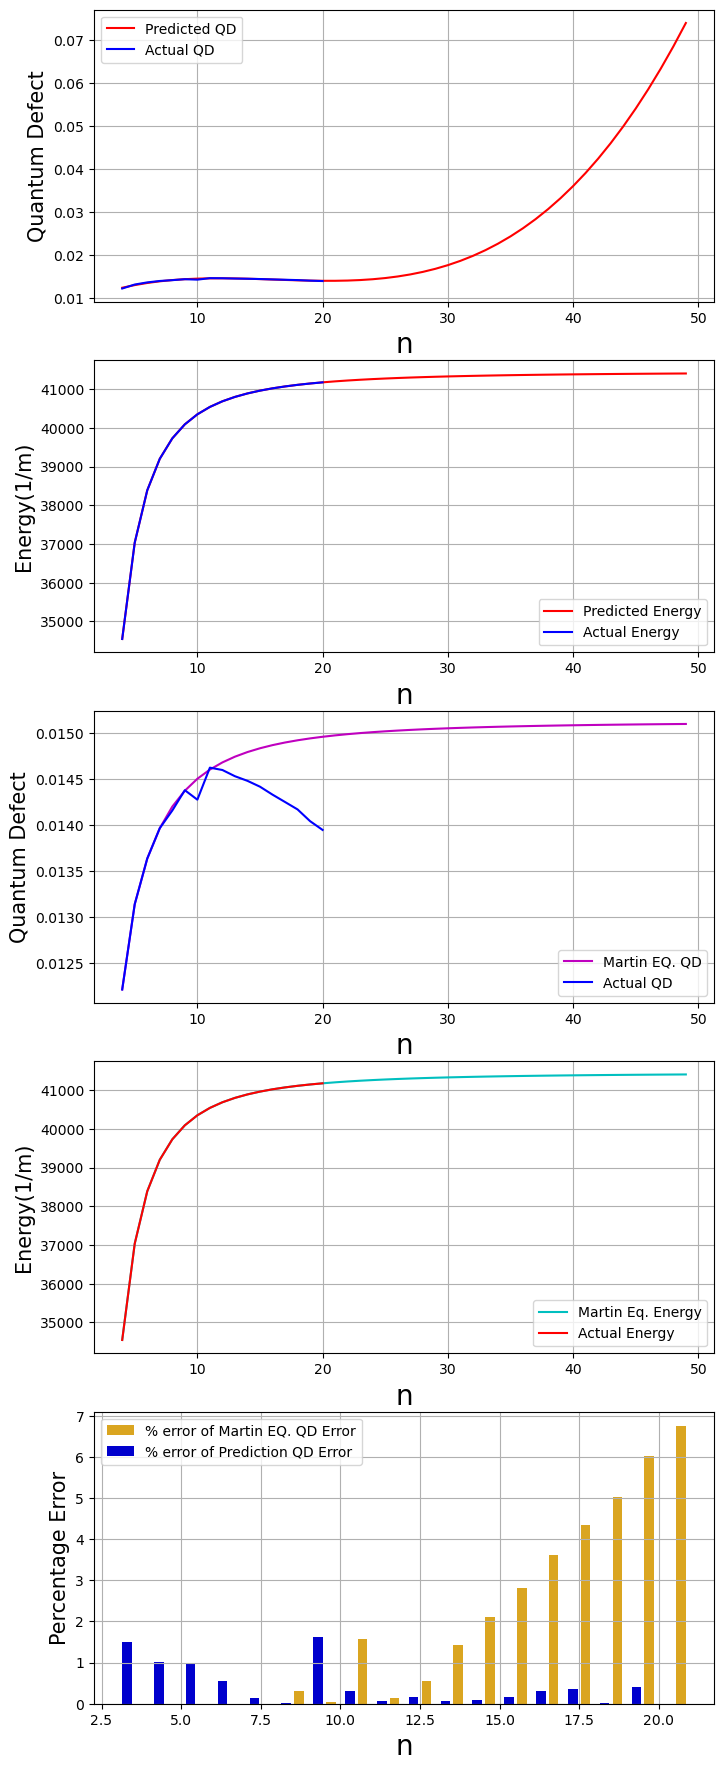

In [1]:
#sodium series 2D1.5 code
from scipy.optimize import curve_fit
from numpy import *
import numpy
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt
import sympy as sm
import pandas as pd
import math as mt
from sympy import *
from sklearn.metrics import mean_squared_error
from math import sqrt
sm.init_printing(use_latex=True)
Degree_QD=3
IE=41449.43133
R=109737.3
s=4 # First orbit number
En=[34548.764,37036.772,38387.268,39200.93,39728.7,40090.31,40348.918,40540.095,40685.509,40798.644,40888.387,40960.771,41020.001,41069.08,41110.202,41145,41174.705]
mol=len(En)
z=1
lst2=[]
del_nod= s-(np.sqrt(R*z**2)/np.sqrt(IE- En[0]))
for t in np.arange(0,len(En)):
    del_n1=(t+s)-(np.sqrt((R*z**2)/(IE- En[t])))
    lst2.append(del_n1)  
lst1=[]          
for k in np.arange(0,4):
    lst0=[]
    for o in np.arange(0,4):
        del_n2=1/(((k+s)-del_nod)**(2*o))
        lst0.append(del_n2)
    lst1.append(lst0)
m1=np.array(lst1)
lst12=[]
for tu in np.arange(4):
    jk=lst2[tu]
    lst12.append(jk)
mat1=np.matrix(m1)  
m2=np.array(lst12)
mat2=np.matrix(m2)
mat3=mat2.T
inverse=mat1.I
e=inverse*mat3
rint=[]
for p in np.arange(0,4):
    ty=float(e[p][0])
    rint.append(ty)
    print(f"a{p}=",float(e[p]))
I=np.array(e)
print(rint)
lst8=[]
for i in np.arange(0,len(I)):
    L=I[i,0]
    lst8.append(L)
lst5=[]
for i in np.arange(0,mol):
    lst4=[]
    for o in np.arange(0,len(lst8)):
        u=lst8[o]
        del_n1=u/(((i+s)-del_nod)**(2*o))  
        lst4.append(del_n1)
    lst5.append(lst4)  
lst6=[]
for k in np.arange(0,len(lst5)):
    G=0
    for o in np.arange(0,len(lst8)):
        L=lst5[k][o]
        G=G+L
    lst6.append(G)
h=np.arange(s,s+mol,1)
B=np.polyfit(h,lst2,Degree_QD)
x1=np.arange(s,s+mol,1)
y1=np.polyval(B,x1)
rmse=sqrt(mean_squared_error(lst2,y1))
print('rmse of Q.D.=',rmse)
poly=np.poly1d(B)
series=np.arange(s,s+mol,1)
pr=poly(series)
n=sm.Symbol('n')
r=0
for i in range(len(B)):
    r=B[i]*n**((len(B))-i-1)+r
print("EQUATION OF PREDICTED QD =")    
display(r)
r1=0
for j in np.arange(len(rint)):
    r1=rint[j]*1/((n-del_nod)**(2*j))+r1
print("EQUATION of a =")    
display(r1)
EQ=lambdify((n),r,numpy)
EQ1=lambdify((n),r1,numpy)
Em=[]
QDm=[]
am=[]
IE=IE
for i in np.arange(s,50,1):
    hi=EQ(i)
    hui=EQ1(i)
    QDm.append(hi)
    am.append(hui)
Em_QD=[]
for i in np.arange(0,len(am)):
    del_11=IE-((R*z**2)/((i+s)-am[i])**2)
    Em_QD.append(del_11)   
Em=[]
for i in np.arange(0,len(QDm)):
    del_1=IE-((R*z**2)/((i+s)-QDm[i])**2)
    Em.append(del_1)    
error=[]
Martin_error=[]
for i in np.arange(mol):
    SE=QDm[i]-lst2[i]
    error.append(SE)
    see=am[i]-lst2[i]
    Martin_error.append(see)
n=list(np.arange(s,len(QDm)+s,1)) 
error1=error.copy()
lst21=lst2.copy()
En1=En.copy()
Martin_error1=Martin_error.copy()
for i in np.arange(mol+1,len(QDm)+s):
    se=" "
    error1.append(se)
    lst21.append(se)
    En1.append(se)
    Martin_error1.append(se)
IE1=[IE]
for i in np.arange(1,len(QDm)+s):
    IE1.append(" ")
p=pd.DataFrame(list(zip(n,lst21,QDm,Em,En1,Em_QD,IE1,am,error1,Martin_error1)),columns=['n',"Actual QD",'predict QD',"predicted E","NIST E","Martin EQ. Energy","Ionization Potential",'Martin EQ',"Prediction Error","Martin Eq Error"])
p.to_excel("2D1.5.xlsx",index=True)

fig, axs = plt.subplots(5,figsize=(8,22))

axs[0].plot(n,QDm,"-r")  
axs[0].plot(series,lst2,"-b")
axs[0].set_xlabel("n",fontsize=20)
axs[0].set_ylabel('Quantum Defect',fontsize=15)
axs[0].legend(["Predicted QD","Actual QD"])
axs[0].grid()

axs[1].plot(n,Em,"-r") 
axs[1].plot(series,En,"-b")
axs[1].set_xlabel("n",fontsize=20)
axs[1].set_ylabel("Energy(1/m)",fontsize=15)
axs[1].legend(["Predicted Energy","Actual Energy"])
axs[1].grid()

axs[2].set_xlabel("n",fontsize=20)
axs[2].set_ylabel("Quantum Defect",fontsize=15)
axs[2].plot(n,am,"-m")
axs[2].plot(series,lst2,"-b")
axs[2].legend(["Martin EQ. QD","Actual QD"])
axs[2].grid()

axs[3].plot(n,Em_QD,"-c") 
axs[3].plot(series,En,"-r")
axs[3].set_xlabel("n",fontsize=20)
axs[3].set_ylabel("Energy(1/m)",fontsize=15)
#axs[3].title.set_text("Actual Energy and Martin Eq. Energy")
axs[3].legend(["Martin Eq. Energy","Actual Energy" ])
axs[3].grid()

t=[]
t1=[]
for I in range(0,len(series)):
    o=np.abs((Martin_error1[I]/am[I])*100)
    o1=np.abs((error1[I]/am[I])*100)
    t.append(o)
    t1.append(o1)

width = 0.3

axs[4].bar(series+0.7, t ,width,color="goldenrod") 
axs[4].bar(series-0.7,t1,width,color="mediumblue")
axs[4].set_xlabel("n",fontsize=20) 
axs[4].set_ylabel("Percentage Error",fontsize=15) 
axs[4].legend(["% error of Martin EQ. QD Error", "% error of Prediction QD Error"])
axs[4].grid() 

plt.show()

